In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier



### Importing dataset

In [3]:

testdata = pd.read_csv("Test.csv")
traindata = pd.read_csv("Train.csv")
data = pd.concat([testdata,traindata])
data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


### Performing EDA


In [4]:
data.shape

(10695, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10695 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10695 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 1002.7+ KB


In [6]:
data.isnull( ).sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [7]:
data.dropna(inplace=True)
data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4,C
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6,D
...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [8]:
data.duplicated().sum()

26

In [9]:
data.drop_duplicates(inplace=True)
data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4,C
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6,D
...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [10]:
data.drop('ID',axis=1,inplace=True)
data

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
5,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4,C
6,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6,D
...,...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


### Changing string to numeric

In [11]:
data['Segmentation'].unique()
label_encoder = LabelEncoder()
label_encoder.fit_transform(data['Segmentation'])
data['Segmentation'] = label_encoder.fit_transform(data["Segmentation"])
data

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,1
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,0
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,1
5,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4,2
6,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6,3
...,...,...,...,...,...,...,...,...,...,...
8062,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,1
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,3
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,3
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,1


In [12]:
data['Gender'].unique()
label_encoder = LabelEncoder()
label_encoder.fit_transform(data['Gender'])
data['Gender'] = label_encoder.fit_transform(data["Gender"])

data['Ever_Married'].unique()
label_encoder = LabelEncoder()
label_encoder.fit_transform(data['Ever_Married'])
data['Ever_Married'] = label_encoder.fit_transform(data["Ever_Married"])

data['Graduated'].unique()
label_encoder = LabelEncoder()
label_encoder.fit_transform(data['Graduated'])
data['Graduated'] = label_encoder.fit_transform(data["Graduated"])

data['Profession'].unique()
label_encoder = LabelEncoder()
label_encoder.fit_transform(data['Profession'])
data['Profession'] = label_encoder.fit_transform(data["Profession"])

data['Spending_Score'].unique()
label_encoder = LabelEncoder()
label_encoder.fit_transform(data['Spending_Score'])
data['Spending_Score'] = label_encoder.fit_transform(data["Spending_Score"])

data['Var_1'].unique()
label_encoder = LabelEncoder()
label_encoder.fit_transform(data['Var_1'])
data['Var_1'] = label_encoder.fit_transform(data["Var_1"])
data

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,1,36,1,2,0.0,2,1.0,5,1
1,1,1,37,1,5,8.0,0,4.0,5,0
3,1,1,59,0,4,11.0,1,2.0,5,1
5,1,1,47,1,1,0.0,1,5.0,3,2
6,1,1,61,1,1,5.0,2,3.0,5,3
...,...,...,...,...,...,...,...,...,...,...
8062,1,1,41,1,0,0.0,1,5.0,5,1
8064,1,0,35,0,4,3.0,2,4.0,3,3
8065,0,0,33,1,5,1.0,2,1.0,5,3
8066,0,0,27,1,5,1.0,2,4.0,5,1


In [13]:
data.corr()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
Gender,1.000000,0.112837,0.013419,-0.052123,0.034327,-0.054797,-0.057018,0.064339,0.020486,0.022244
Ever_Married,0.112837,1.000000,0.570370,0.202373,-0.128395,-0.099199,-0.629138,-0.085559,0.088603,-0.168684
Age,0.013419,0.570370,1.000000,0.246458,0.044689,-0.188608,-0.282186,-0.281270,0.176757,-0.186338
Graduated,-0.052123,0.202373,0.246458,1.000000,-0.309011,0.037794,-0.161816,-0.245261,0.135602,-0.138497
Profession,0.034327,-0.128395,0.044689,-0.309011,1.000000,-0.032975,0.225336,0.103711,-0.030022,0.165880
Work_Experience,-0.054797,-0.099199,-0.188608,0.037794,-0.032975,1.000000,0.059355,-0.070308,0.024606,-0.000407
Spending_Score,-0.057018,-0.629138,-0.282186,-0.161816,0.225336,0.059355,1.000000,-0.110843,-0.039582,0.070900
Family_Size,0.064339,-0.085559,-0.281270,-0.245261,0.103711,-0.070308,-0.110843,1.000000,-0.154349,0.150103
Var_1,0.020486,0.088603,0.176757,0.135602,-0.030022,0.024606,-0.039582,-0.154349,1.000000,-0.013031
Segmentation,0.022244,-0.168684,-0.186338,-0.138497,0.165880,-0.000407,0.070900,0.150103,-0.013031,1.000000


<Axes: >

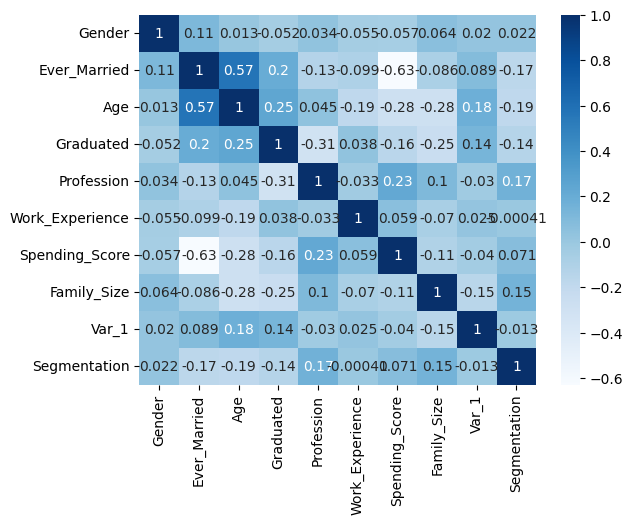

In [14]:
sns.heatmap(data.corr(), annot=True, cmap="Blues")


### Spliting X and Y

In [15]:
X = data.drop(["Segmentation"],axis=1)
Y = data["Segmentation"]
X


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,1,36,1,2,0.0,2,1.0,5
1,1,1,37,1,5,8.0,0,4.0,5
3,1,1,59,0,4,11.0,1,2.0,5
5,1,1,47,1,1,0.0,1,5.0,3
6,1,1,61,1,1,5.0,2,3.0,5
...,...,...,...,...,...,...,...,...,...
8062,1,1,41,1,0,0.0,1,5.0,5
8064,1,0,35,0,4,3.0,2,4.0,3
8065,0,0,33,1,5,1.0,2,1.0,5
8066,0,0,27,1,5,1.0,2,4.0,5


In [16]:
Y

0       1
1       0
3       1
5       2
6       3
       ..
8062    1
8064    3
8065    3
8066    1
8067    1
Name: Segmentation, Length: 8793, dtype: int32

### Spliting to train and test for training

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)


In [18]:
X_train.shape,X_test.shape

((7034, 9), (1759, 9))

In [19]:
Y_train.shape,Y_test.shape

((7034,), (1759,))

### Trainning the model

In [20]:
classify_model = LogisticRegression(max_iter=1000)

In [21]:
print(classify_model.fit(X_train,Y_train))


LogisticRegression(max_iter=1000)


In [22]:
preds = classify_model.predict(X_test)
preds


array([3, 3, 2, ..., 3, 3, 0])

### prediction with confusion matrix

[[198  20  96 129]
 [161  35 151  67]
 [ 87  20 240  61]
 [103  10  53 328]]


<Axes: >

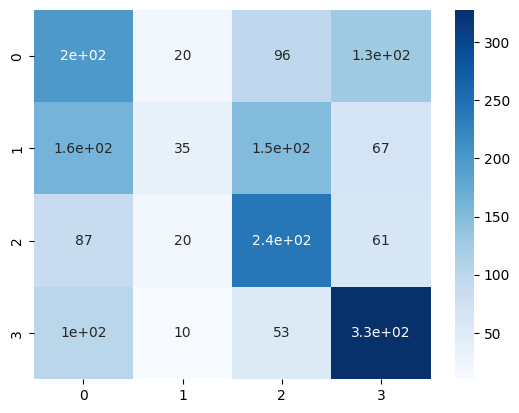

In [23]:
print(confusion_matrix(Y_test,preds))
sns.heatmap(confusion_matrix(Y_test,preds),cmap="Blues",annot=True)

### Accuracy

In [24]:
accuracy_score(Y_test,preds)

0.4553723706651506

In [25]:
Y_test,preds

(663     3
 661     0
 1379    2
 3022    3
 418     3
        ..
 1497    3
 2552    1
 3361    1
 4142    3
 947     1
 Name: Segmentation, Length: 1759, dtype: int32,
 array([3, 3, 2, ..., 3, 3, 0]))

### Decision Tree Classifier  

In [26]:
dt_class = DecisionTreeClassifier()
dt_class.fit(X_train,Y_train)
y_preds = dt_class.predict(X_test)
accuracy_score(Y_test,y_preds)


0.36441159749857877

### Model accuracy comparison

In [27]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


models={"Logistic Regression": LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Decision Tree": DecisionTreeClassifier()}

def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    np.random.seed(42)
    model_scores ={}

    for name, model in models.items():

        # Fit the mdoel to the data
        model.fit(X_train,Y_train)
        # Evaluate the mdoel and append its score to model_scores
        model_scores[name]=model.score(X_test,Y_test)
    return model_scores


In [28]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             Y_train=Y_train,
                             Y_test=Y_test)

model_scores;

c:\Users\isan_\anaconda3\envs\workshop\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


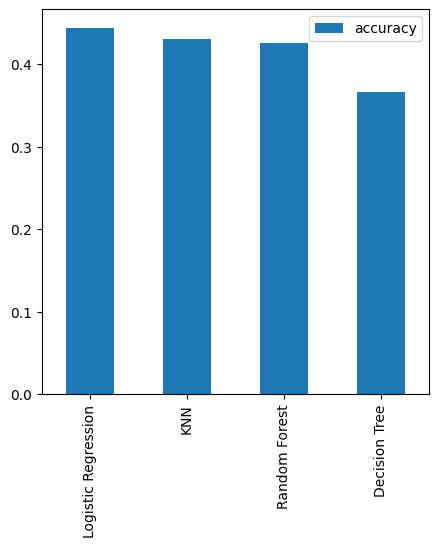

In [29]:
model_compare=pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(figsize=(5,5));

In [30]:
lr_model = LogisticRegression()

In [32]:
cv_acc = cross_val_score(lr_model,X,Y,cv=5,scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc 

c:\Users\isan_\anaconda3\envs\workshop\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\isan_\anaconda3\envs\workshop\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

0.45355127958860686

### Classification Report

In [38]:
from sklearn.metrics import classification_report


print(classification_report(Y_test,preds))

              precision    recall  f1-score   support

           0       0.36      0.45      0.40       443
           1       0.41      0.08      0.14       414
           2       0.44      0.59      0.51       408
           3       0.56      0.66      0.61       494

    accuracy                           0.46      1759
   macro avg       0.44      0.45      0.41      1759
weighted avg       0.45      0.46      0.42      1759



In [39]:

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV


log_reg_grid={"C":np.logspace(-4,4,30),
              "solver":["newton-cg"]}


gs_log_reg= GridSearchCV(LogisticRegression(class_weight="balanced"),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=True)


gs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['newton-cg']},
             verbose=True)

In [40]:
gs_log_reg.best_params_


{'C': 0.03039195382313198, 'solver': 'newton-cg'}

In [41]:
gs_log_reg.score(X_test,Y_test)

0.45252984650369527

In [52]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
log_reg_grid={"C":np.logspace(-4,4,30),
              "solver":["liblinear"]}

rf_grid = {"n_estimators": np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}


gs_log_reg= RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=5,
                         n_iter=20,
                         verbose=True)


gs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [53]:
gs_log_reg.score(X_test,Y_test)

0.48379761227970436